Seaborn-kaaviot

countplot = Lukumääräyhteenveto kategoriselle muuttujalle
histplot = Luokiteltu jakauma määrälliselle muuttujalle 
barplot = Pylväskaavio keskiarvoista tai joistain muista tunnusluvuista
boxplot = Viiden luvun yhteenveto (pienin, alaneljännes, mediaani, yläneljännes, suurin)
scatterplot = Hajontakaavio, joka havainnolistaa kahden määrällisen muuttujan välistä riippuvuutta
joinplot = Hajontakaavio täydennettynä muuttujien jakaumilla

Seaborn kaavioiden keskeisimmät parametrit:
data
x
y
hue (minkä muuttujan mukaan tehdään värierottelu)
row (yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)
col (yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)
kind (kaaviolaji yhdistelmäkaavioiden catplot, displot ja relplot yhteydessä)

Kaavioiden värit ja koot

Voidaan määrittää värit color-parametrin avulla. 
Voit määrittää kaavioiden luonnissa värikartan palette-parametrilla
Yksittäisen kaavion koon voit määrittää luomalla kaaviota ympäröivän kuvin (figure) ennen kaavioin luomista. plt.figure(figsize(10,6))

Tuonnit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Grafiikan tyylimäärittely "whitegrid" sisältää taustaviivoituksen (grid)
#Muista ovat mm. "darkgrid", "dark", "white" ja "ticks"
sns.set_style("whitegrid")

In [3]:
#Tuodaan seaborn esimerkkidata tips
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Countplot

<Axes: xlabel='size', ylabel='count'>

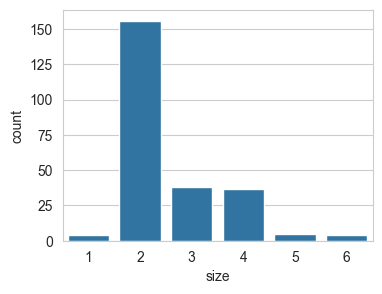

In [4]:
#Eri kokoisten seuruiden lkm
plt.figure(figsize=(4, 3))
sns.countplot(tips, x="size")

<Axes: xlabel='day', ylabel='count'>

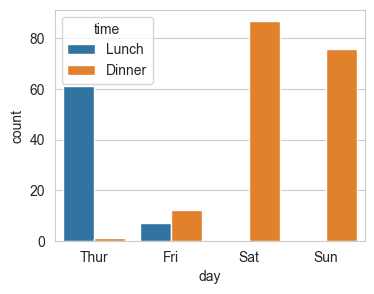

In [5]:
#lounas- ja illallisseuruiden lkm eri viikonpäivinä
plt.figure(figsize=(4,3))
sns.countplot(tips, x="day", hue="time")

For loopilla voit esittää usen muuttujan jakauman yhdessä kuviossa, joka sisältää monta kaaviota.

Komento fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3)) luo kuvion, jossa on neljä kaaviota vierekkäin (ncols). komento palauttaa sekä kuvion (fig), että sen sisältämien kaavioiden listan (axs)

Enumerate-funktio palauttaa sekä katergoriset-listan muuttjien järjestysnumerot että muuttujien nimet. Järjestynumeroita tarvitaan osoittamaan mihin kaavioon mikäkin muuttuja sijoitetaan (ax=axs[1])

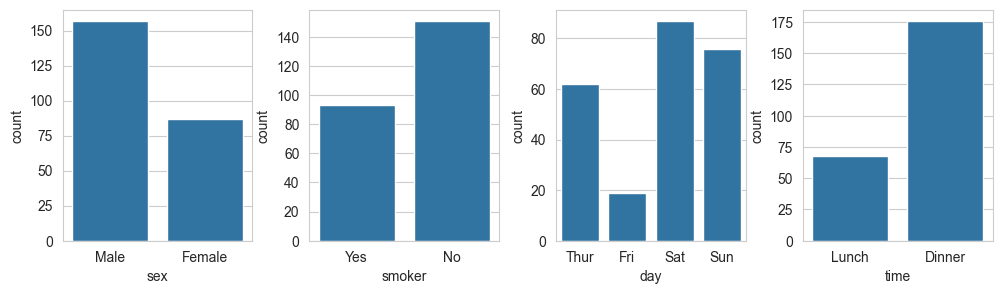

In [10]:
#Kategositen muuttujien yhteenvedot
categ = ["sex", "smoker", "day", "time"]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

for i, var in enumerate(categ):
    sns.countplot(tips, x=var, ax=axs[i])
fig.subplots_adjust(wspace=0.3) #Kaavioiden välinen tyhjätila

countplot sopii käytettäväksi catplot-toiminnon yhteydessä (kind="count"). Tällöin voit esittää useita kaavioita kateforisten muuttujien määräämille ryhmille. Seuraavassa ryhmiteltävinä kategorisina muuttujina on sex(col="sex") ja smoker (row="smoker")

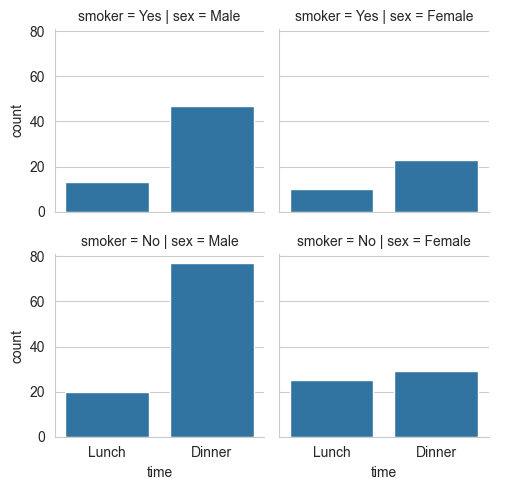

In [11]:
# Lounas- ja päivällisseurueiden lkm sukupuolen ja tupakoinnin mukaan
sns.catplot(tips, x="time", col="sex", row="smoker", kind="count", height=2.5)

Histplot

Sopii määrällisen muuttujan luokittelun jakauman esittämiseen

<Axes: xlabel='total_bill', ylabel='Count'>

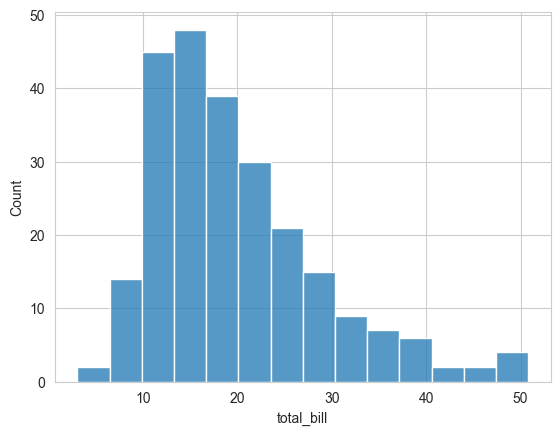

In [12]:
sns.histplot(tips, x="total_bill")

<Axes: xlabel='total_bill', ylabel='Count'>

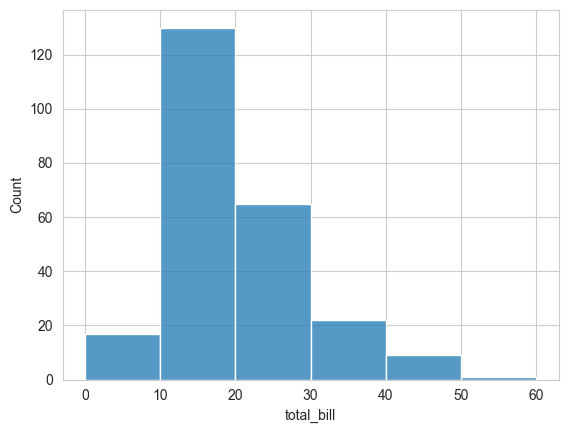

In [13]:
#Itse määritellyt luokkarajat
sns.histplot(tips, x="total_bill", bins=[0, 10, 20, 30, 40, 50, 60])

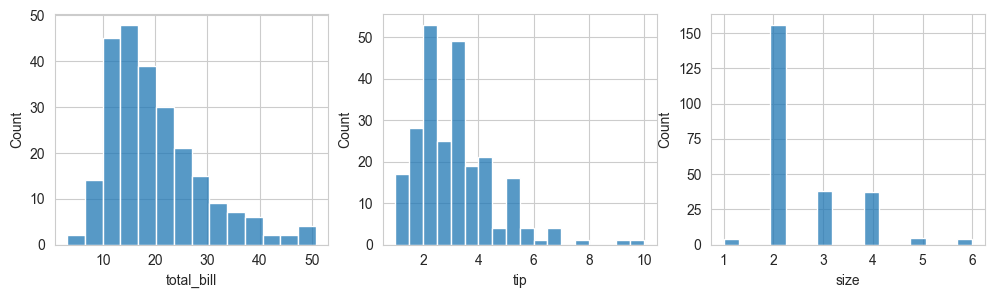

In [14]:
#Määrällisetn muutujien histogrammit
maaralliset = ["total_bill", "tip", "size"]
fig, axs = plt.subplots(1, 3, figsize=(12,3))
for i, var in enumerate(maaralliset):
    sns.histplot(tips, x=var, ax=axs[i])

histplot sopii käytettäväksi displot-funktion yhteydessä (kind=hist). Tällöin voit esittää useita histogrammeja kategoristen muuttujien määrämille ryhmille

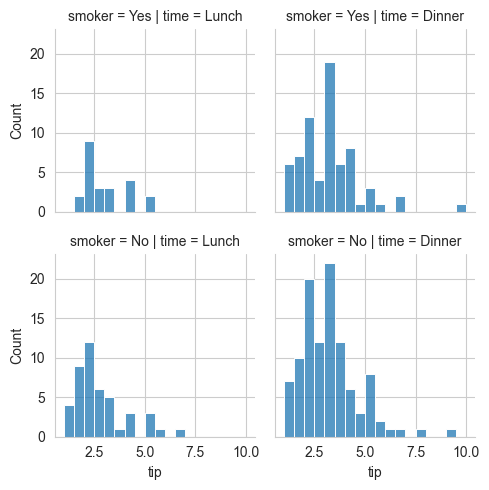

In [15]:
#Tipin jakaumat tupakoinnin ja ajan mukaan
sns.displot(tips, x="tip", row="smoker", col="time", kind="hist", height=2.5)

Bartplot

Sopii keskiarvojen esittämiseen. Musta viiva havainnolistaa virhemarginaalin (Luottamusväli)

<Axes: xlabel='day', ylabel='tip'>

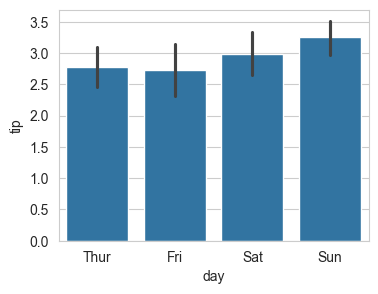

In [ ]:
#Eripäivien tippien keskiarvo
plt.figure(figsize=(4,3))
sns.barplot(tips, x="day", y="tip")

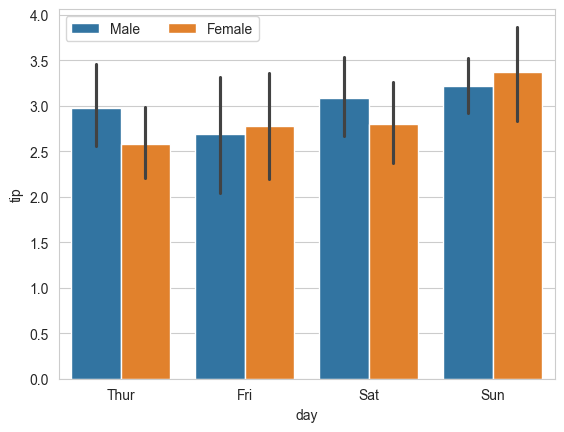

In [17]:
#Eri päivien tippien keskiarvot sukupuolen mukaan
sns.barplot(tips, x="day", y="tip", hue="sex")
plt.legend(ncol=2)

Voit käyttää barplottia catplot:in yhteydessä (kind="bar").

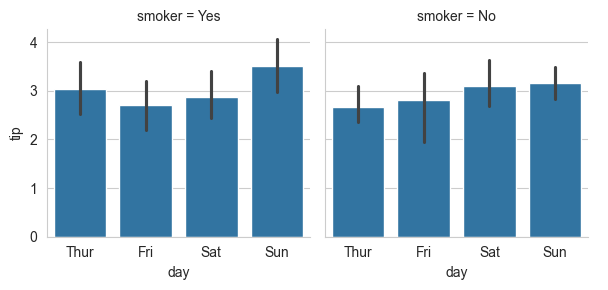

In [18]:
sns.catplot(tips, x="day", y="tip", col="smoker", kind="bar", height=3)

Boxplot

Havainnollistaa viiden luvun yhteenvedon

<Axes: xlabel='tip'>

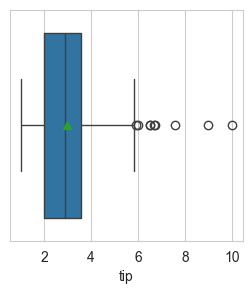

In [19]:
# Tipin suuruuden jakauma tunnuslukuina
plt.figure(figsize=(3,3))
sns.boxplot(tips, x="tip", showmeans=True)

<Axes: xlabel='time', ylabel='tip'>

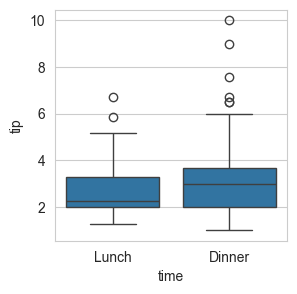

In [20]:
# Tipin suuruus lounas- ja päivällisseurueilla
plt.figure(figsize=(3,3))
sns.boxplot(tips, x="time", y="tip")

boxplot sopii käytettäväksi catplot-funktion kanssa yhdessä (kind="box")

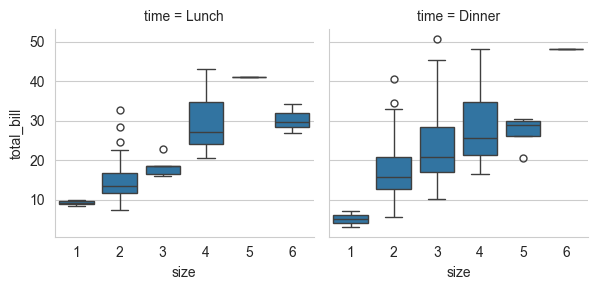

In [21]:
sns.catplot(tips, x="size", y="total_bill", col="time", kind="box", height=3)

Scatterplot

Havainnollistaa kahden määrällisen muuttujan riippuvuuden

<Axes: xlabel='total_bill', ylabel='tip'>

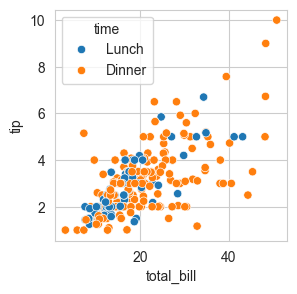

In [22]:
# Laskun loppusumman ja tipin välinen riippuvuus
plt.figure(figsize=(3,3))
sns.scatterplot(tips, x="total_bill", y="tip", hue="time")

scatterplot sopii käytettäväksi replot-funtion kanssa yhteydessä(kind="scatter").

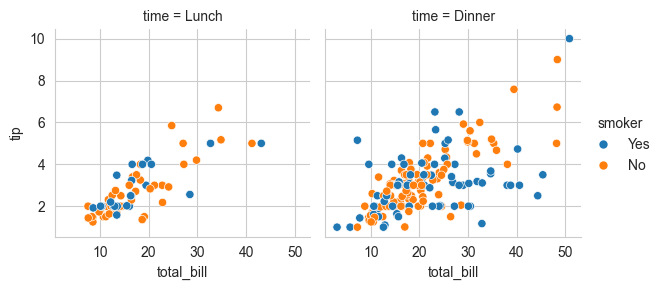

In [23]:
sns.relplot(tips, x="total_bill", y="tip", col="time", hue="smoker", kind="scatter", height=3)

Jointplot

Havainnolistaa kahden määrällisen muuttujan välisen riippuvuuden ja esittää samalla kummankin muuttujan jakaumat

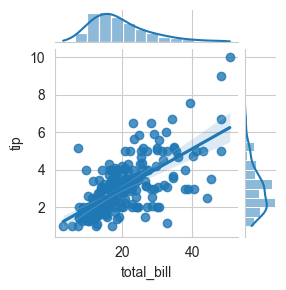

In [24]:
# Laskun loppusumman ja tipin välinen riippuvuus
sns.jointplot(tips, x="total_bill", y="tip", kind="reg", height=3)

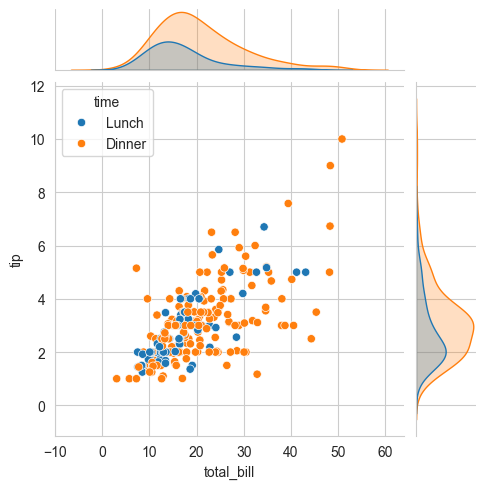

In [25]:
# Värierottelu ajan mukaan
sns.jointplot(tips, x="total_bill", y="tip", hue="time", height=5)